In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Twitter
import time as time
import nltk
from collections import Counter
import re

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
#품사목록 불러오기
tag = pd.read_excel("pstag.xlsx")
twitter_tag = list(tag['Twitter'])
tw_tag=[x for x in twitter_tag if str(x) != 'nan' ]
tw_tag=tw_tag[2:]

In [4]:
df = pd.read_excel('Ruriweb_HW.xlsx')

In [5]:
#포스팅에서 한글 외 문자 제거

hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

#형태소 문장 단위 추출
dic_Twitter = []
for i in range(len(df)):
    p = hangul.sub(' ', df['titles'][i])
    s = Twitter().pos(p, stem=True, norm=True)
    dic_Twitter.append(s)

In [6]:
word = []
noun = []
verb = []
for x in dic_Twitter:
    for y in x:
        word.append(y)

In [7]:
pos_c = Counter([j for i,j in word])

In [8]:
pos_t = Counter([i for i,j in word])

In [9]:
pos_c.most_common()

[('Noun', 191613),
 ('Verb', 51114),
 ('Josa', 38850),
 ('Adjective', 22296),
 ('Suffix', 6094),
 ('KoreanParticle', 3113),
 ('Adverb', 2266),
 ('Determiner', 2250),
 ('VerbPrefix', 995),
 ('Exclamation', 476),
 ('NounPrefix', 244),
 ('Conjunction', 146),
 ('PreEomi', 9),
 ('Eomi', 6)]

In [10]:
pos_t.most_common()

[('하다', 12369),
 ('질문', 7223),
 ('견적', 6794),
 ('이', 6738),
 ('좀', 6675),
 ('부탁드리다', 4766),
 ('에', 4623),
 ('보다', 4547),
 ('가', 4459),
 ('컴퓨터', 4356),
 ('요', 4228),
 ('이다', 3521),
 ('드리다', 3403),
 ('추천', 2895),
 ('있다', 2818),
 ('되다', 2810),
 ('노트북', 2785),
 ('모니터', 2778),
 ('를', 2584),
 ('을', 2499),
 ('그래픽카드', 2076),
 ('으로', 2072),
 ('조립', 2044),
 ('컴', 2008),
 ('어떻다', 1842),
 ('로', 1802),
 ('조언', 1729),
 ('에서', 1666),
 ('안', 1473),
 ('게임', 1459),
 ('용', 1421),
 ('중', 1381),
 ('구매', 1333),
 ('는', 1328),
 ('윈도우', 1306),
 ('만원', 1295),
 ('문제', 1237),
 ('알다', 1204),
 ('좋다', 1196),
 ('파워', 1189),
 ('사다', 1137),
 ('그래픽', 1137),
 ('ㅠㅠ', 1109),
 ('사용', 1105),
 ('쓰다', 1066),
 ('메인보드', 1057),
 ('은', 1055),
 ('도와주다', 1054),
 ('관련', 1045),
 ('인데', 1042),
 ('구입', 1039),
 ('보드', 1027),
 ('들다', 1014),
 ('의', 1002),
 ('와', 997),
 ('카드', 983),
 ('님', 972),
 ('도', 960),
 ('업그레이드', 943),
 ('사양', 937),
 ('해주다', 920),
 ('정도', 918),
 ('만', 911),
 ('맞추다', 892),
 ('들', 878),
 ('괜찮다', 877),
 ('바꾸다', 875),
 ('

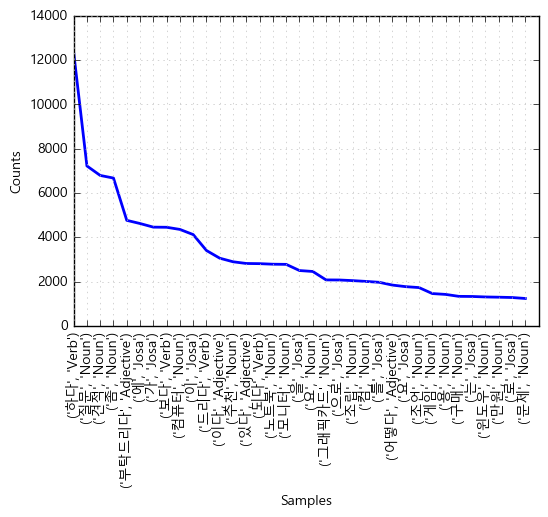

In [11]:
nltk.Text(word).plot(35)

In [12]:
Noun = []
Verb = []
Josa = []
Adjective = []
Suffix = []
VerbPrefix = []
Adverb = []
VerbPrefix = []
KoreanParticle = []
Determiner = []
for x in dic_Twitter:
    for y in x:
        if y[1] == 'Noun':
            Noun.append(y)
        elif y[1] == 'Verb':
            Verb.append(y)
        elif y[1] == 'Josa':
            Josa.append(y)
        elif y[1] == 'Adjective':
            Adjective.append(y)
        elif y[1] == 'Suffix':
            Suffix.append(y)
        elif y[1] == 'VerbPrefix':
            VerbPrefix.append(y)
        elif y[1] == 'Adverb':
            Adverb.append(y)
        elif y[1] == 'VerbPrefix':
            VerbPrefix.append(y)
        elif y[1] == 'KoreanParticle':
            KoreanParticle.append(y)
        elif y[1] == 'Determiner':
            Determiner.append(y)

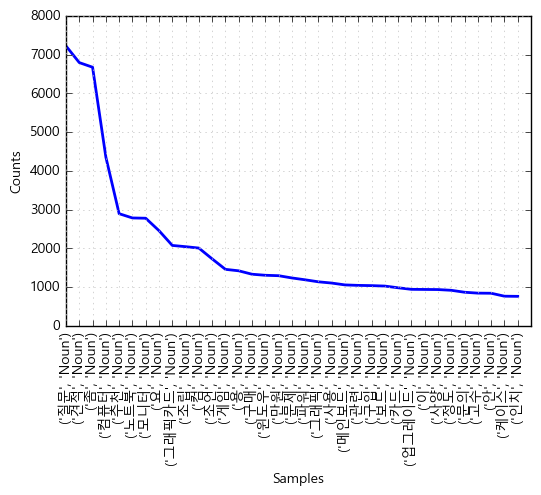

In [13]:
nltk.Text(Noun).plot(35)

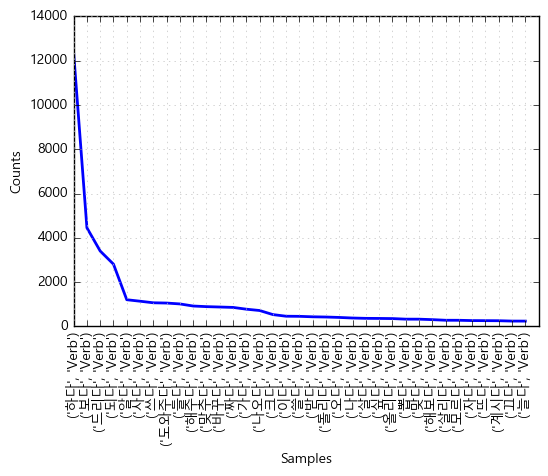

In [14]:
nltk.Text(Verb).plot(35)

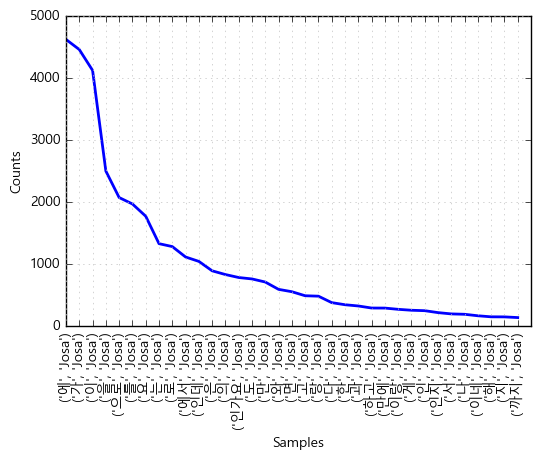

In [15]:
nltk.Text(Josa).plot(35)

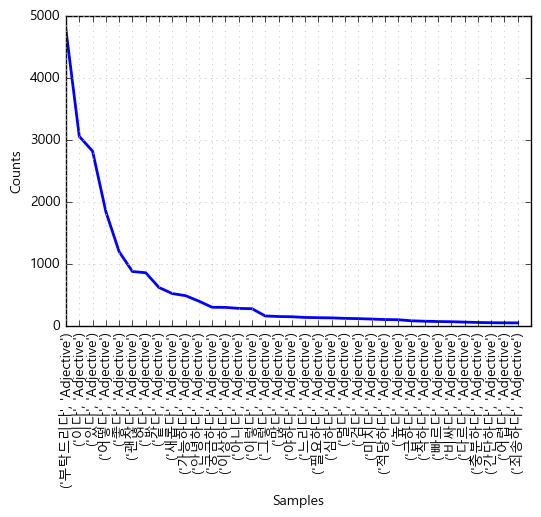

In [16]:
nltk.Text(Adjective).plot(35)

In [30]:
pd.DataFrame(Counter(Noun).most_common()).rename(columns={0:'Name', 1:'Counts'}).to_excel('IT_noun.xlsx', index=False)